### Imports and CUDA

In [1]:
!pip uninstall -y typing_extensions
!pip install typing_extensions==4.11.0
!pip uninstall wandb -y
!pip install wandb
!pip install matplotlib
!pip install scikit-learn
!pip install pandas

Found existing installation: typing_extensions 4.13.2
Uninstalling typing_extensions-4.13.2:
  Successfully uninstalled typing_extensions-4.13.2
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.11.1 requires typing-extensions>=4.12.2, but you have typing-extensions 4.11.0 which is incompatible.
typing-inspection 0.4.0 requires typing-extensions>=4.12.0, but you have typing-extensions 4.11.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found existing installation: wandb 0.19.9
Uninstalling wandb-0.19.9:
  Successfully uninstalled wandb-0.19.9
  Using cached wandb-0.19.9-py3-none-win_amd64.whl.metadata (10 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached wandb-0.19.9-py3-none-win_amd64.whl (20.2 MB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Matplotlib
import requests
import matplotlib.pyplot as plt
# Numpy
import numpy as np
# Torch
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

### Run this if using Wandb for Hyperparameter Tuning, else do not run this

In [3]:
# import wandb
# wandb.login()

In [4]:
# Use GPU if available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Objective

#### To develop a model that predicts taxi availability within a specific area for the next three hours. This means that if the model is run at 12 PM, it will provide predicted taxi availability for 1 PM, 2 PM, and 3 PM.

The area of interest is defined by the following geographical boundaries:

    North: 1.35106
    South: 1.32206
    East: 103.97839
    West: 103.92805

To identify the taxis currently available within this region, we use the TaxiAvailabilityScript.py.

This script collects real-time data, which serves as input for our predictive model.

By leveraging historical taxi availability trends and real-time data, our model aims to provide accurate forecasts, helping commuters, ride-hailing services, and urban planners make informed decisions.


# **To-Do List for Taxi Availability Prediction**

## **Step 1: Cleaning the Taxi Availability Data**
The first step involves retrieving and preprocessing the taxi availability dataset. The dataset consists of the following columns:

1. **DateTime**  
2. **Taxi Available Throughout Singapore**  
3. **Taxi Available in Selected Box Area**  
4. **Coordinates[]**  

For our specific use case, **the coordinates column will not be used for now**.  

To prepare the data for the neural network:  
- **Inputs:** We will use `DateTime` and `Taxi Available Throughout Singapore` as features.  
- **Output:** `Taxi Available in Selected Box Area` will be the target variable.  
- **DateTime Conversion:** Since `DateTime` is not in a format suitable for neural networks, we will extract relevant features:
  - **IsWeekend**: A binary feature (1 if it's a weekend, 0 otherwise).  
  - **Hour**: Transformed into a numerical value between **1 and 24** (avoiding 0, which may cause training issues).  

---

## **Step 2: Adding Additional Features**  
*(Partially completed; will be refined over time)*  

Aside from the existing columns, we aim to incorporate additional features that may improve prediction accuracy:  

1. **ERP Rates (Electronic Road Pricing) at the given time and location**  
   - Uncertain if this will significantly impact predictions. Further analysis is needed.  

2. **Number of LTA (Land Transport Authority) gantry locations**  
   - Again, its usefulness remains uncertain—further evaluation required.  

3. **Traffic Incidents in the Selected Area**  
   - A script (`TrafficIncidentScript.py`) has been written to update `traffic_incident.csv` with the latest traffic incidents.  
   - Over time, as the dataset grows, we hope this feature will become useful.  

4. **Number of Taxi Stands in the Area**  
   - Currently **not useful** because our area of interest is fixed.  
   - However, if we allow dynamic selection of areas in the future, this could become relevant.  

5. **Temperature at a Given Time and Date** *(To be implemented)*  

6. **Rainfall Data** *(To be implemented)*  

To ensure all features align properly, we will **synchronize all datasets based on DateTime** before feeding them into the model.  

---

## **Step 3: Creating the Training-Test Split**  
- Initially, we will perform an **80/20 Training-Test split** for simplicity.  
- In the future, we may introduce a **Training-Validation-Test split** to further refine model performance.  

---

## **Step 4: Building the Model**  
We will begin with an **LSTM model**, as LSTMs are well-suited for time-series forecasting.  
- **Initial Limitation:** The model, in its basic form, will only predict the next hour.  
- **Future Improvement:** A **sliding window approach** will be explored and implemented to extend predictions further.  

---

## **Step 5: Model Evaluation and Improvement**  
- After the initial model is trained, we will assess its performance.  
- Based on results, we will explore potential improvements, such as hyperparameter tuning, architectural modifications, or additional feature engineering.  

---

This structured approach will guide the development of a robust and accurate taxi availability prediction model. 🚖💡


## **Preparing the taxi_availability data here.**

Normalization of certain inputs are done as well, but I am unsure if it is the right thing to do as well.

In [5]:
merged_weather_taxi_df = "merged_file_with_mean.csv"
taxi_df = pd.read_csv(merged_weather_taxi_df, delimiter = ",")

#Adjusting for weather parameters
taxi_df = taxi_df.drop(columns = "stationId")

#Adjusting for taxi_vailability parameters
taxi_df_coordinates = taxi_df["Coordinates[]"]
taxt_df_datetime = taxi_df["DateTime"]
taxi_df = taxi_df.drop(columns = "Coordinates[]")
taxi_df["DateTime"] = pd.to_datetime(taxi_df["DateTime"])
taxi_df = taxi_df.drop(columns = "Taxi Available in Selected Box Area")

taxi_df["IsWeekend"] = (taxi_df["DateTime"].dt.weekday >= 5).astype(int)
taxi_df["Hour"] = taxi_df["DateTime"].dt.hour + 1  # Convert 0-23 to 1-24
taxi_df = taxi_df.drop(columns = "DateTime")

# print(taxi_df.dtypes)
print(taxi_df.head)

<bound method NDFrame.head of        Taxi Available throughout SG  temp_value  humidity_value  \
0                              1924        27.1            84.1   
1                              2259        27.3            82.5   
2                              2400        27.4            81.2   
3                              2677        27.5            81.9   
4                              2437        27.7            78.0   
...                             ...         ...             ...   
25586                          1962        27.0            82.9   
25587                          2025        27.3            81.7   
25588                          2144        27.4            82.2   
25589                          2447        27.3            82.9   
25590                          2615        27.6            82.3   

       rainfall_value  peak_period  Average Taxi Availability  IsWeekend  Hour  
0                 0.0            1                 102.416667          0    24  
1  

### Converting all dtypes into float32

In [6]:
numeric_columns = taxi_df.select_dtypes(include=['int64', 'int32','float64','object']).columns
print("numeric_columns",numeric_columns)
taxi_df[numeric_columns] = taxi_df[numeric_columns].astype('float32')
numeric_columns = taxi_df.select_dtypes(include=['int64', 'int32','float64','object']).columns

# Convert selected columns to float32
taxi_df[numeric_columns] = taxi_df[numeric_columns].astype('float32')

numeric_columns Index(['Taxi Available throughout SG', 'temp_value', 'humidity_value',
       'rainfall_value', 'peak_period', 'Average Taxi Availability',
       'IsWeekend', 'Hour'],
      dtype='object')


### Normalizing all values

In [7]:
#---------------Normalise-----------------------
data_min = taxi_df.min(axis=0)
data_max = taxi_df.max(axis=0)
taxi_df_normalized = (taxi_df - data_min) / (data_max - data_min)


taxi_df_output_normalized  = taxi_df_normalized["Average Taxi Availability"]
taxi_df_normalized.to_csv("normalized_data.csv", index=False)  # Set index=False to exclude row numbers

# Convert to NumPy arrays
input_data = taxi_df_normalized.values  # Shape: (5120, num_features)
output_data = taxi_df_output_normalized.values  # Shape: (5120,)

print("Input Data: ",input_data.shape)
print("Output Data: ",output_data.shape)

Input Data:  (25591, 8)
Output Data:  (25591,)


### No Normalization Style

### Create Sequence Function

In [8]:
seq_length = 24
pred_horizon = 3  # Number of future time steps to predict

def create_sequences(data, labels, seq_length, pred_horizon):
    xs, ys = [], []
    for i in range(0, len(data), seq_length):  # Start from 0 and increment by seq_length
        if i + seq_length + pred_horizon <= len(data):  # Ensure enough data for prediction horizon
            xs.append(data[i:i + seq_length])  # Input sequence (continuous)
            ys.append(labels[i + seq_length : i + seq_length + pred_horizon])  # Next 3 values
    return np.array(xs), np.array(ys)


In [9]:
X, y = create_sequences(input_data, output_data, seq_length,pred_horizon)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y[:, None], dtype=torch.float32)
y = y.permute(0, 2, 1)  # Shape: (samples, pred_horizon, 1)

# Split sizes
total_samples = len(X)
train_size = int(0.8 * total_samples)
val_size = int(0.1 * total_samples)
test_size = total_samples - train_size - val_size

# Split the data
trainX, valX, testX = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
trainY, valY, testY = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Create TensorDatasets
train_dataset = TensorDataset(trainX, trainY)
val_dataset = TensorDataset(valX, valY)
test_dataset = TensorDataset(testX, testY)

# DataLoaders
batch_size = 17
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Example of accessing a batch of data
for inputs, targets in train_loader:
    print(f'Inputs: {inputs.shape}, Targets: {targets.shape}')
    break  # Only print the first batch for verification

Inputs: torch.Size([17, 24, 8]), Targets: torch.Size([17, 3, 1])


In [10]:
class BiLSTM_pt(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(BiLSTM_pt, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.num_directions = 2  # Since it's bidirectional
        
        # LSTM layer
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = torch.nn.Linear(hidden_dim * 2, output_dim)  # Fix here

    def forward(self, x, h0=None, c0=None):
        if h0 is None or c0 is None:
            h0 = torch.randn(self.layer_dim * self.num_directions, x.size(0), self.hidden_dim).to(x.device)
            c0 = torch.randn(self.layer_dim * self.num_directions, x.size(0), self.hidden_dim).to(x.device)

        # LSTM forward pass
        out, (hn, cn) = self.lstm(x, (h0, c0))

        # Pass only the last timestep's output to the FC layer
        out = self.fc(out[:, -1, :])  

        return out, hn, cn


In [13]:
def train(model, dataloader, val_loader, num_epochs, learning_rate):
    # Set the loss function and optimizer
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    model.train()  # Set the model to training mode
    loss_graph = []
    val_graph = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0.0

        hidden_state, cell_state = None, None  # Reset for each epoch

        for batch_idx, (inputs, targets) in enumerate(dataloader):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            output, hidden_state, cell_state = model(inputs, hidden_state, cell_state)
            output = output.unsqueeze(-1)
            output = output.permute(0, 2, 1)

            # Compute loss
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()

            hidden_state = hidden_state.detach()
            cell_state = cell_state.detach()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(dataloader)
        loss_graph.append(avg_loss)

        # Validation step (optional)
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_inputs, val_targets in val_loader:
                val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)

                val_output, _, _ = model(val_inputs, hidden_state, cell_state)
                val_output = val_output.unsqueeze(-1).to(device)
                val_output = val_output.permute(0, 2, 1).to(device)

                # Compute validation loss
                v_loss = criterion(val_output, val_targets)
                val_loss += v_loss.item()
                
        avg_val_loss = val_loss / len(dataloader)
        val_graph.append(avg_val_loss)
        model.train()
        
        if epoch % 50 == 0 or epoch == num_epochs - 1:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.6f}, Validation Loss: {avg_val_loss:.6f}')

    return loss_graph, val_graph

Epoch 1/1000, Loss: 0.017484, Validation Loss: 0.001447
Epoch 51/1000, Loss: 0.003374, Validation Loss: 0.000641
Epoch 101/1000, Loss: 0.002715, Validation Loss: 0.001105
Epoch 151/1000, Loss: 0.002075, Validation Loss: 0.001228
Epoch 201/1000, Loss: 0.001672, Validation Loss: 0.001020
Epoch 251/1000, Loss: 0.001420, Validation Loss: 0.001417
Epoch 301/1000, Loss: 0.001346, Validation Loss: 0.001223
Epoch 351/1000, Loss: 0.001238, Validation Loss: 0.001085
Epoch 401/1000, Loss: 0.001209, Validation Loss: 0.001048
Epoch 451/1000, Loss: 0.001184, Validation Loss: 0.001068
Epoch 501/1000, Loss: 0.001186, Validation Loss: 0.001062
Epoch 551/1000, Loss: 0.001180, Validation Loss: 0.001044
Epoch 601/1000, Loss: 0.001181, Validation Loss: 0.000960
Epoch 651/1000, Loss: 0.001179, Validation Loss: 0.000898
Epoch 701/1000, Loss: 0.001162, Validation Loss: 0.000976
Epoch 751/1000, Loss: 0.001168, Validation Loss: 0.000942
Epoch 801/1000, Loss: 0.001160, Validation Loss: 0.000924
Epoch 851/1000, L

Text(0, 0.5, 'Loss')

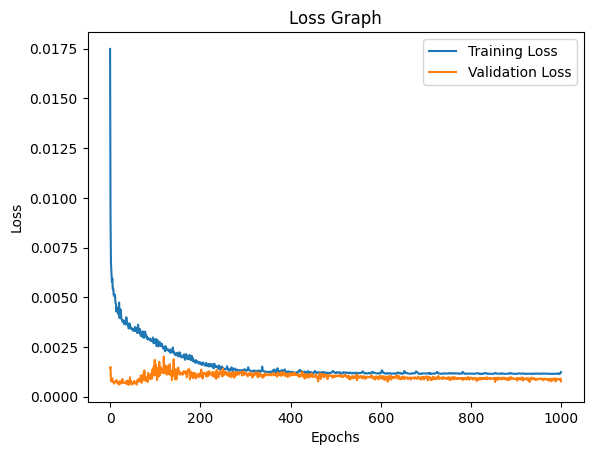

In [14]:
import os
# Define the model parameters
input_size = 8
hidden_size = 256
num_layers = 2 # Can be changed to stack multiple LSTM layers!
output_size = 3
num_epochs = 1000
dataloader = train_loader
learning_rate = 1e-3

#Create the model
model = BiLSTM_pt(input_size, hidden_size, num_layers, output_size).to(device)
loss_graph, val_graph = train(dataloader = dataloader, val_loader=val_loader, model = model, num_epochs = num_epochs, learning_rate = learning_rate)
val_graph
# Plot the loss graph
plt.plot(loss_graph)
plt.plot(val_graph)
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")

### The next 3 cells are used for Hyper Parameter Sweeping using Wandb. Do not run these cells unless you are logged into Wandb and is doing hyper parameter sweep

In [ ]:
# sweep_config = {
#     "method": "bayes",
#     "metric": {
#         "name": "loss",
#         "goal": "minimize"
#     },
#     "parameters": {
#         "learning_rate": {
#             "min": 1e-3,
#             "max": 0.01
#         },
#         "hidden_size": {
#             "values": [64, 128, 256]
#         },
#         "num_layers": {
#             "values": [1, 2, 3]
#         },
#         "num_epochs": {
#             "values": [300, 500, 1000]
#         }
#     }
# }

In [ ]:
# def sweep_train():
#     config_defaults = {
#         "learning_rate": 0.01,
#         "num_epochs": 300,
#         "hidden_size": 50,
#         "num_layers": 2
#     }

#     # Initialize wandb
#     wandb.init(config=config_defaults)
#     config = wandb.config
#     model = BiLSTM_pt(6, config.hidden_size, config.num_layers, 3).to(device)

#     # Same training as above
#     criterion = torch.nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
#     model.train()
#     loss_graph = []

#     for epoch in range(config.num_epochs):
#         epoch_loss = 0.0
#         hidden_state, cell_state = None, None

#         for batch_idx, (inputs, targets) in enumerate(train_loader):
#             inputs, targets = inputs.to(device), targets.to(device)

#             optimizer.zero_grad()
#             output, hidden_state, cell_state = model(inputs, hidden_state, cell_state)
#             output = output.unsqueeze(-1).permute(0, 2, 1)

#             loss = criterion(output, targets)
#             loss.backward()
#             optimizer.step()

#             hidden_state = hidden_state.detach()
#             cell_state = cell_state.detach()

#             epoch_loss += loss.item()

#         avg_loss = epoch_loss / len(train_loader)
#         loss_graph.append(avg_loss)

#         # Log to wandb
#         wandb.log({"epoch": epoch, "loss": avg_loss})

#         if epoch % 50 == 0 or epoch == config.num_epochs - 1:
#             print(f"Epoch {epoch+1}/{config.num_epochs}, Loss: {avg_loss:.6f}")

In [ ]:
# sweep_id = wandb.sweep(sweep_config, project="DeepLearning Project")
# wandb.agent(sweep_id, function=sweep_train, count=30)

### The next 2 cells are used to save the last ran model and to load models. Do not run unless you are saving or loading models from file.

In [15]:
# Saving the final model
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('./final_models', exist_ok=True)
torch.save(model.state_dict(), './final_models/Bi_LSTM.pth')

In [16]:
# Define the model parameters
input_size = 8
hidden_size = 256
num_layers = 2 # Can be changed to stack multiple LSTM layers!
output_size = 3

model = BiLSTM_pt(input_size, hidden_size, num_layers, output_size).to(device)
model.load_state_dict(torch.load('./final_models/Bi_LSTM.pth'))

<All keys matched successfully>

### The final cell here is used for evaluation

Normalized output[0]: [[0.26759451627731323], [0.2676408290863037], [0.2676471769809723]]
Normalized target[0]: [[0.28474345803260803], [0.28712198138237], [0.313285768032074]]
Denormalized output[0]: [[65.62755584716797], [65.638916015625], [65.64047241210938]]
Denormalized target[0]: [[69.83333587646484], [70.41666412353516], [76.83333587646484]]
--------------------------------------------------
Normalized output[0]: [[0.2153395712375641], [0.21532315015792847], [0.21533039212226868]]
Normalized target[0]: [[0.1994563490152359], [0.20931021869182587], [0.20965002477169037]]
Denormalized output[0]: [[52.81203079223633], [52.80800247192383], [52.80978012084961]]
Denormalized target[0]: [[48.91666793823242], [51.33333206176758], [51.41666793823242]]
--------------------------------------------------
Normalized output[0]: [[0.3454046845436096], [0.34548699855804443], [0.34538236260414124]]
Normalized target[0]: [[0.4254162609577179], [0.4447842538356781], [0.5280326008796692]]
Denormali

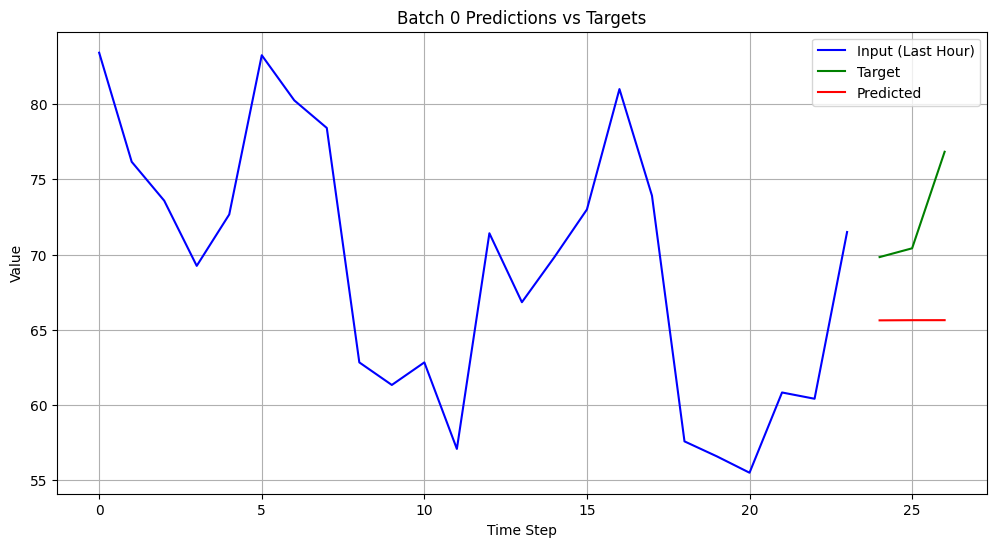

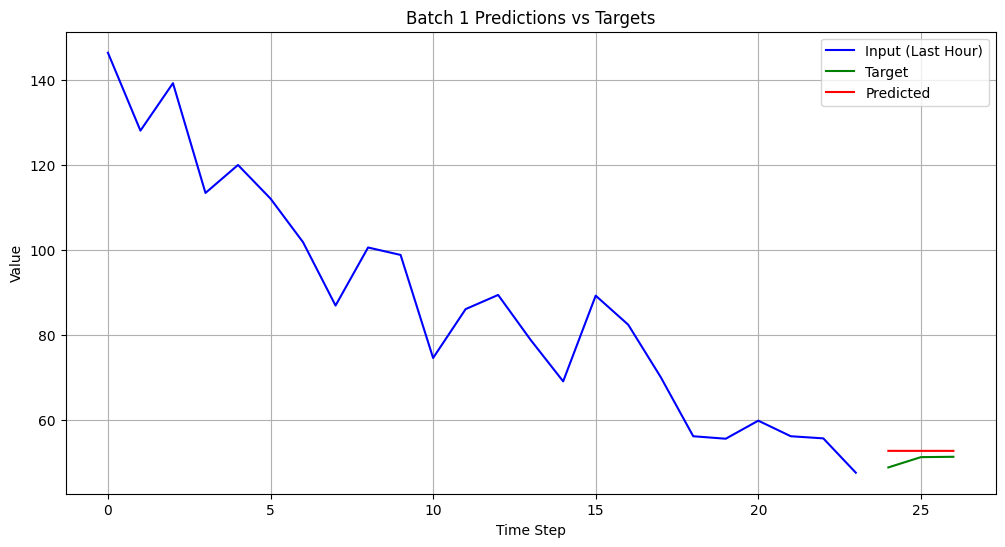

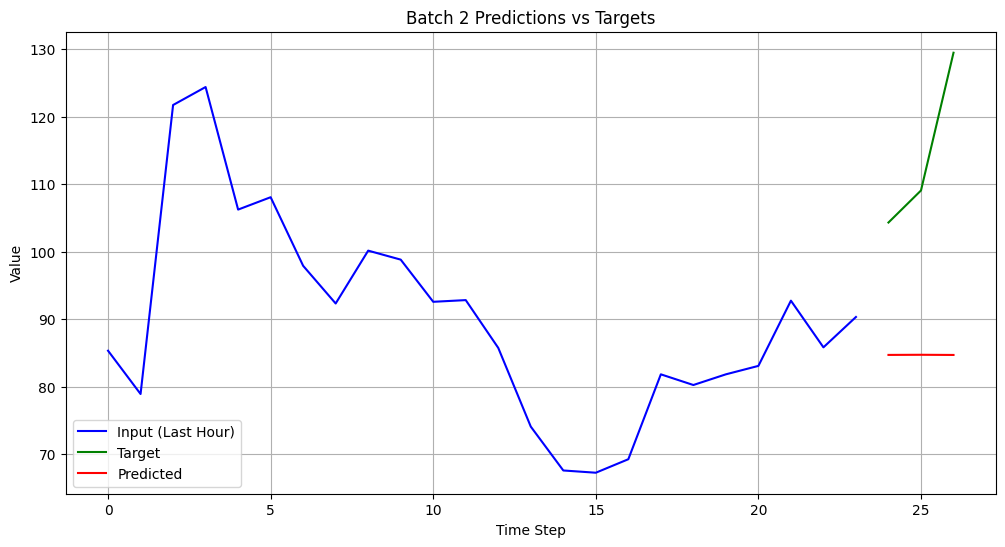

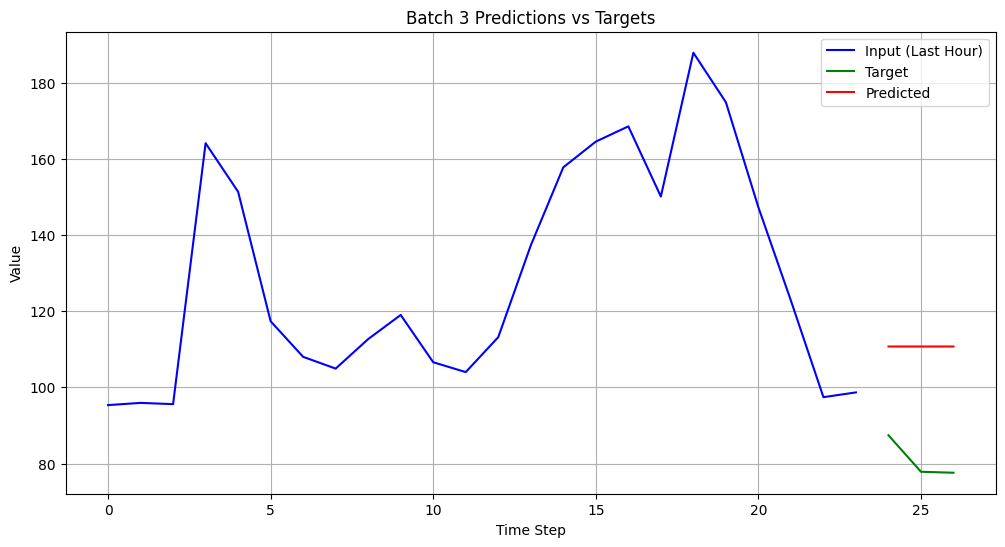

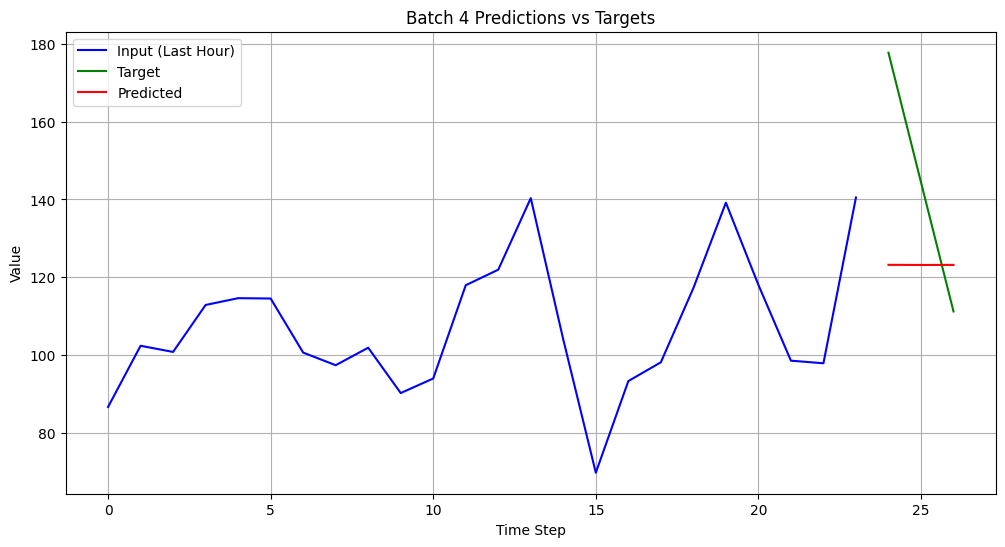

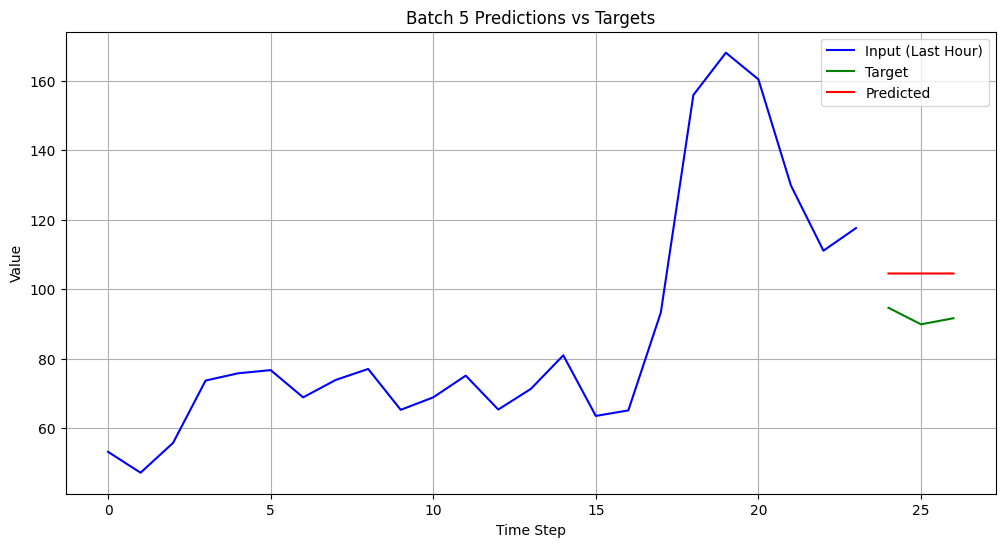

In [32]:
import collections

model.eval()

# Initialize variables to track loss
loss_value = 0
num_batches = 0

# Define the loss function
criterion = torch.nn.MSELoss()

# Initialize hidden state and cell state
hidden_state, cell_state = None, None  
mae_list = []
visualise_dataset = collections.defaultdict(list)

# Disable gradient computation for validation
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):

        # Forward pass
        inputs = inputs.to(device)
        output, cell_state, hidden_state = model(inputs, cell_state, hidden_state)
        output = output.unsqueeze(-1).permute(0, 2, 1)

        output = output.to(device)
        result = [[[v] for v in inner[0]] for inner in output.tolist()]
        output = torch.tensor(result).to(device)
        targets = targets.to(device)

        # Denormalize predictions and targets (for all 3 time steps)
        inputs_denorm = inputs * (data_max["Average Taxi Availability"] - data_min["Average Taxi Availability"]) + data_min["Average Taxi Availability"]
        output_denorm = output * (data_max["Average Taxi Availability"] - data_min["Average Taxi Availability"]) + data_min["Average Taxi Availability"]
        targets_denorm = targets * (data_max["Average Taxi Availability"] - data_min["Average Taxi Availability"]) + data_min["Average Taxi Availability"]
        
        visualise_dataset[batch_idx] = inputs_denorm[:,:, 5:6].cpu().numpy()
        # Add targets to visualise_dataset
        visualise_dataset[batch_idx] = np.concatenate((visualise_dataset[batch_idx], targets_denorm.cpu().numpy()), axis=1)
        visualise_dataset[batch_idx] = np.concatenate((visualise_dataset[batch_idx], output_denorm.cpu().numpy()), axis=1)
        
        # Compute loss on normalized data
        loss_value += criterion(output, targets)
        mae = torch.mean(torch.abs(output_denorm - targets_denorm))
        mae_list.append(mae)

        # Print a sample of the normalized and denormalized values
        print("Normalized output[0]:", output[0].tolist())  
        print("Normalized target[0]:", targets[0].tolist())  
        print("Denormalized output[0]:", output_denorm[0].tolist())  
        print("Denormalized target[0]:", targets_denorm[0].tolist())  
        print("-" * 50)

# Compute average loss
loss_value = loss_value / (len(test_loader) - 1)
print("Predicted output shape:", output.shape)
print("True output shape:", targets.shape)
print(f'Average Validation Loss: {loss_value:.4f}')

mae = torch.mean(torch.tensor(mae_list))
print(f'Mean Absolute Error: {mae:.4f}')

# Compute average loss
loss_value = loss_value / (len(test_loader) - 1)
print("Predicted output shape:", output.shape)
print("True output shape:", targets.shape)
print(f'Average Validation Loss: {loss_value:.4f}')

mae = torch.mean(torch.tensor(mae_list))
print(f'Mean Absolute Error: {mae:.4f}')

# Visualize the predictions and targets for the first batch
for batch_idx, data in visualise_dataset.items():
    inputs = data[0, :24]       # First 25 timesteps
    targets = data[0, 24:27]    # 3 timesteps: ground truth
    predictions = data[0, 27:]  # 3 timesteps: model predictions
    plt.figure(figsize=(12, 6))
    # Input: plotted from timestep 0 to 24
    plt.plot(range(24), inputs[:, -1], label='Input (Last Hour)', color='blue')
    # Targets: plotted starting from timestep 24 to 26
    plt.plot(range(24, 27), targets[:, -1], label='Target', color='green')
    # Predictions: plotted from timestep 27 to 29
    plt.plot(range(24, 27), predictions[:, -1], label='Predicted', color='red')
    plt.title(f'Batch {batch_idx} Predictions vs Targets')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()